In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from ipywidgets import interact,  FloatSlider

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

# from imblearn.under_sampling import TomekLinks
# from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pickle

In [2]:
import numpy
print (numpy.__version__)

1.20.3


In [3]:
import pandas as pd 
print (pd.__version__)

1.3.2


In [8]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.width=100
plt.style.use('ggplot')

In [9]:
df= pd.read_csv("C:\\Users\\GAURAV\\PycharmProjects\\creditcardrev1\\prediction_module\\creditcard.csv")

In [10]:
# !pip install pandas-profiling

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# print(profile)

# pf= ProfileReport(df)

# pf.to_widgets()


In [11]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
#Dataset
pd.set_option("display.max_columns",None)

df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Preprocessing

In [16]:
#checking the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
legitimate = df[df.Class == 0]
fraud = df[df.Class != 0]

In [19]:
legitimate.shape

(284315, 31)

In [20]:
fraud.shape

(492, 31)

In [21]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
#comparing the values between these two classs
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [24]:
legitimate_sample = legitimate.sample(n=492)

In [25]:
legitimate_sample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180171,124413.0,-0.107283,1.061253,-1.098503,-1.474405,1.664497,-0.850369,1.719095,-0.445303,-0.093699,0.246916,-0.238071,-0.414357,-1.237851,0.781658,-0.644064,-0.212471,-1.095636,0.544976,0.542402,0.092863,0.131645,0.760815,-0.420303,-1.075280,-0.207009,0.115318,0.327715,0.081353,0.77,0
14409,25550.0,-2.598033,-7.499842,-0.814583,1.421518,-3.927679,0.662921,1.230345,-0.311454,0.410629,-0.611207,-1.170549,-0.584571,-0.591918,-0.565105,-0.759078,0.937008,0.936157,-0.894356,0.321296,4.104977,1.306770,-0.599699,-1.831263,0.530838,-0.333146,-0.331708,-0.315282,0.377717,2034.86,0
42803,41252.0,1.105853,-0.004009,0.166973,1.130601,-0.337011,-0.534971,0.048944,0.023307,0.321326,0.015852,-0.563096,-0.947136,-2.313065,0.886118,1.429851,-0.129502,-0.014660,-0.308883,-0.729214,-0.224377,0.058066,0.027285,-0.084513,0.026040,0.519159,-0.296187,0.006038,0.020456,52.82,0
204992,135540.0,1.870483,-1.113778,-2.795574,-0.329588,0.062821,-1.359011,0.700571,-0.569725,-0.938993,0.988297,-1.349281,-1.149570,-1.582631,1.050112,-0.133564,-2.145699,0.253548,0.893281,-0.691757,-0.298122,-0.007462,0.039819,-0.222413,0.771036,0.397199,0.970023,-0.176555,-0.053109,214.98,0
120198,75741.0,-1.100113,1.517290,0.565333,0.845643,0.701478,1.975270,-0.535389,-3.354412,-0.634249,-0.183209,0.022711,1.100953,0.658003,0.170006,-0.535485,-0.553344,-0.075138,0.161641,1.337610,0.707541,-0.634019,0.350658,-0.258411,-1.321317,-0.031026,-0.199139,0.336631,-0.020808,76.53,0
147849,89073.0,1.575342,-1.472909,-0.971931,0.772740,-0.862520,0.026184,-0.404692,-0.041918,-0.169565,0.894326,-1.427766,-0.467308,-0.459981,0.138606,0.352767,-1.279661,-0.284681,1.451545,-1.350172,-0.152607,-0.174715,-0.537004,0.066549,0.519159,-0.273995,-0.720297,0.010283,0.019752,274.00,0
206404,136196.0,-0.102138,1.106086,-0.511159,-0.732056,1.461255,-1.029827,1.410356,-0.659975,0.022970,-0.747518,-0.940357,0.076781,1.251422,-1.369294,0.278904,0.223678,-0.201858,0.693045,-0.384817,-0.048600,0.300043,1.141789,-0.337895,-0.683779,-0.558420,-0.304892,-0.181717,0.052856,5.39,0
153531,99329.0,-4.408326,1.527565,1.702566,4.596400,-0.272142,2.310917,-2.490633,-4.093687,1.398875,2.546798,-0.632441,-3.738342,0.646169,1.134748,1.004666,0.902370,0.905517,1.411479,0.826507,-1.889565,3.921757,-0.981510,1.556237,0.420113,0.608359,0.645908,1.282856,-0.150085,17.40,0
162168,114894.0,1.984494,-0.092001,-1.043226,1.089504,0.364728,0.225963,-0.119194,0.042575,0.795256,0.133708,-1.678673,-0.023222,-0.331123,0.182934,0.168271,0.274814,-0.691323,-0.398278,0.111260,-0.206530,-0.503633,-1.435312,0.401594,-0.207222,-0.314994,-1.141470,0.026305,-0.028386,28.70,0
56687,47539.0,1.154370,-0.289757,0.776574,1.500672,-0.357503,1.130159,-0.662868,0.436116,1.555722,-0.368306,-2.270919,-0.173998,-1.642935,-0.494487,-1.461132,-0.781435,0.497850,-0.836625,0.564611,-0.281726,-0.500997,-1.029268,-0.019433,-0.982108,0.508188,-0.441239,0.080442,0.014637,7.99,0


In [26]:
new_df = pd.concat([legitimate_sample, fraud], axis=0)

In [27]:
new_df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [28]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [29]:
new_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,97837.579268,0.113669,-0.084225,-0.002379,-0.034949,-0.078142,-0.016510,-0.009814,0.007745,0.011009,0.047897,-0.012832,-0.015990,-0.060573,0.036576,-0.037492,-0.001309,-0.018640,-0.027510,-0.006109,-0.022241,-0.007501,0.004287,-0.075515,-0.018809,-0.027784,-0.015134,-0.004477,0.041963,95.186829
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [30]:
"This shows that we got a good sample because we can clearly see that the mean values for both the legit and fraud are same as in the total dataset"

'This shows that we got a good sample because we can clearly see that the mean values for both the legit and fraud are same as in the total dataset'

# Feature Selection

In [31]:
X = new_df.drop(columns = "Class", axis =1)

In [32]:
Y = new_df["Class"]

In [33]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
180171,124413.0,-0.107283,1.061253,-1.098503,-1.474405,1.664497,-0.850369,1.719095,-0.445303,-0.093699,0.246916,-0.238071,-0.414357,-1.237851,0.781658,-0.644064,-0.212471,-1.095636,0.544976,0.542402,0.092863,0.131645,0.760815,-0.420303,-1.075280,-0.207009,0.115318,0.327715,0.081353,0.77
14409,25550.0,-2.598033,-7.499842,-0.814583,1.421518,-3.927679,0.662921,1.230345,-0.311454,0.410629,-0.611207,-1.170549,-0.584571,-0.591918,-0.565105,-0.759078,0.937008,0.936157,-0.894356,0.321296,4.104977,1.306770,-0.599699,-1.831263,0.530838,-0.333146,-0.331708,-0.315282,0.377717,2034.86
42803,41252.0,1.105853,-0.004009,0.166973,1.130601,-0.337011,-0.534971,0.048944,0.023307,0.321326,0.015852,-0.563096,-0.947136,-2.313065,0.886118,1.429851,-0.129502,-0.014660,-0.308883,-0.729214,-0.224377,0.058066,0.027285,-0.084513,0.026040,0.519159,-0.296187,0.006038,0.020456,52.82
204992,135540.0,1.870483,-1.113778,-2.795574,-0.329588,0.062821,-1.359011,0.700571,-0.569725,-0.938993,0.988297,-1.349281,-1.149570,-1.582631,1.050112,-0.133564,-2.145699,0.253548,0.893281,-0.691757,-0.298122,-0.007462,0.039819,-0.222413,0.771036,0.397199,0.970023,-0.176555,-0.053109,214.98
120198,75741.0,-1.100113,1.517290,0.565333,0.845643,0.701478,1.975270,-0.535389,-3.354412,-0.634249,-0.183209,0.022711,1.100953,0.658003,0.170006,-0.535485,-0.553344,-0.075138,0.161641,1.337610,0.707541,-0.634019,0.350658,-0.258411,-1.321317,-0.031026,-0.199139,0.336631,-0.020808,76.53


In [34]:
Y.head()

180171    0
14409     0
42803     0
204992    0
120198    0
Name: Class, dtype: int64

In [35]:
# train and test set split
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y , random_state =2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [38]:
from sklearn.feature_selection import mutual_info_classif

In [39]:
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.12391014, 0.21317266, 0.30943079, 0.34790948, 0.37649868,
       0.17886393, 0.16145617, 0.28378589, 0.15635447, 0.21439062,
       0.42883381, 0.37466314, 0.39796222, 0.03286626, 0.50498036,
       0.01785852, 0.34215047, 0.45828158, 0.20776274, 0.11042078,
       0.09956275, 0.21919122, 0.02567286, 0.0856472 , 0.05794309,
       0.01260299, 0.03679928, 0.2483982 , 0.21524351, 0.18854855])

In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

V14       0.504980
V17       0.458282
V10       0.428834
V12       0.397962
V4        0.376499
V11       0.374663
V3        0.347909
V16       0.342150
V2        0.309431
V7        0.283786
V27       0.248398
V21       0.219191
V28       0.215244
V9        0.214391
V1        0.213173
V18       0.207763
Amount    0.188549
V5        0.178864
V6        0.161456
V8        0.156354
Time      0.123910
V19       0.110421
V20       0.099563
V23       0.085647
V24       0.057943
V26       0.036799
V13       0.032866
V22       0.025673
V15       0.017859
V25       0.012603
dtype: float64

<AxesSubplot:>

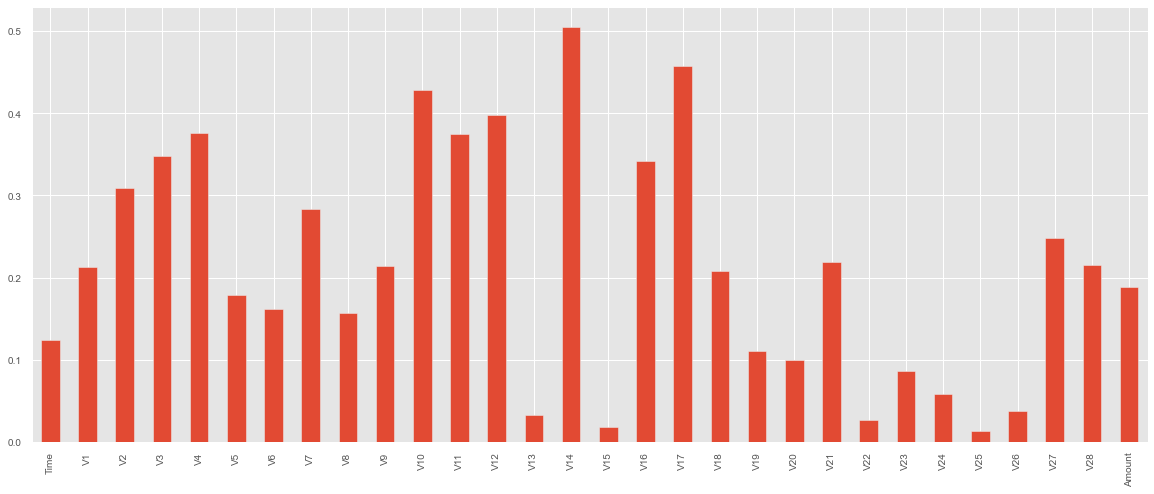

In [41]:
mutual_info.plot.bar(figsize=(20, 8))

<AxesSubplot:>

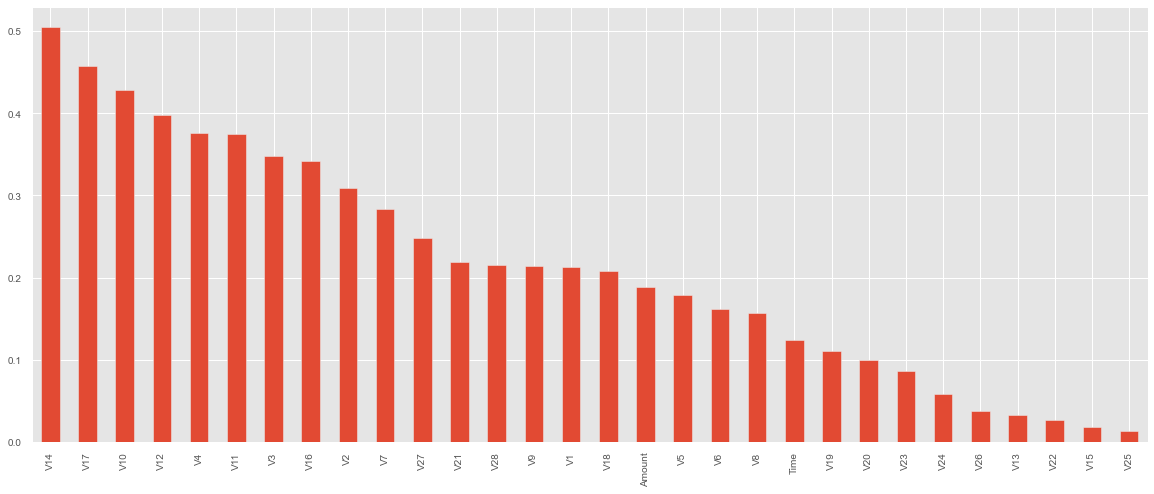

In [42]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20, 8))

In [43]:
from sklearn.feature_selection import SelectKBest

In [44]:
# Now we will be selecting top 20 features
sel_five_cols= SelectKBest(mutual_info_classif, k=21)
sel_five_cols.fit(X_train,Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14',
       'V16', 'V17', 'V18', 'V21', 'V27', 'V28', 'Amount'],
      dtype='object')

Following are the top features that are important for our model training

In [45]:
#Dropping non significant features
X_train.drop(['V13','V15','V19','V20','V22','V23','V24','V25','V26'], axis=1 , inplace= True)

C:\Users\GAURAV\anaconda3\envs\linearreg2\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,-1.769060,-0.651414,-0.005423,0.217470,-1.173978,0.243347,-0.342301,0.042619,0.150606,-0.117140,549.06
140035,83502.0,-0.600715,0.701079,2.329212,2.489529,0.102883,0.619412,0.038719,0.314017,-0.680651,0.215874,-0.888366,-0.104953,-0.345343,-0.227025,0.177353,-0.317510,0.240201,0.171587,0.155823,23.76
97987,66471.0,-0.485186,0.536680,2.162872,1.026839,-0.209583,0.309082,0.177331,0.113891,0.032739,-0.531469,-1.130945,0.692965,-0.692083,-0.211556,-0.254040,0.218384,0.070964,0.199973,0.166458,51.52
134816,80977.0,1.410746,-0.578753,-0.180024,-0.810094,-0.603898,-0.699306,-0.361694,-0.221472,-0.776606,0.653707,-1.077989,-1.132969,-0.022491,1.259880,0.013797,-1.053582,0.175278,-0.017120,0.007703,49.55
95075,65156.0,0.803333,-0.880422,1.037030,0.339958,-1.372579,-0.233101,-0.496627,0.076229,0.539191,-0.194890,1.395710,1.333648,-0.194574,0.503057,-0.452281,0.290715,0.256148,-0.071393,0.040892,195.50


# Model training

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
logistic = LogisticRegression()

In [49]:
logistic.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

In [50]:
# checking accuracy of training data

In [51]:
X_train_pred = logistic.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [52]:
# accuracy of training data
print(train_data_accuracy)

0.9301143583227446


In [53]:
#Removing the unwanted features from the test set
X_test.drop(['V13','V15','V19','V20','V22','V23','V24','V25','V26'], axis=1, inplace= True)

C:\Users\GAURAV\anaconda3\envs\linearreg2\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Model Testing

In [54]:
X_test_pred = logistic.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [55]:
print(test_data_accuracy)

0.8984771573604061


In [56]:
# from google.colab import drive
# drive.mount('/content/drive')

In [57]:
# model_save_name = 'Credit_Card_pickle.pt'
# path = F"/content/gdrive/My Drive/{model_save_name}" 
# torch.save(model.state_dict(), path)

In [58]:
import pickle

In [59]:
with open('Credit_Card_pickle','wb') as f:
    pickle.dump(logistic,f)

In [60]:
with open('Credit_Card_pickle','rb') as f:
    classifier = pickle.load(f)

In [61]:
# scaler = StandardScaler() # mean= 0, std=1

In [62]:
# y_pred= classifier.predict([[1.0,-0.966272,	-0.185226,	1.792993,	-0.863291,	-0.010309,	1.247203,	0.237609,	0.377436,	-1.387024,	-0.054952,	-0.226487,	0.178228,	0.507757,	-0.287924,	-0.631418,	-1.059647,	-0.684093,	1.965775,	-1.232622,	-0.208038,	-0.108300,	0.005274,	-0.190321,	-1.175575,	0.647376,	-0.221929,	0.062723,	0.061458,	123.50	]])
# y_pred

In [63]:
#  lr.predict(test1)

In [64]:
'''1.0	-1.358354	-1.340163	1.773209	0.379780	-0.503198	1.800499	0.791461	0.247676	-1.514654	0.207643	0.624501	0.066084	0.717293	-0.165946	2.345865	-2.890083	1.109969	-0.121359	-2.261857	0.524980	0.247998	0.771679	0.909412	-0.689281	-0.327642	-0.139097	-0.055353	-0.059752	378.66	
Time=1.56738000e+05 
v1= 2.05177897e+00 
v2=2.49040678e-02 
v3=-1.82775529e+00
v4=2.42284099e-01
v5= 5.25845178e-01 
v6=-4.11303003e-01 
v7= 6.99788939e-03
v9 =-1.23070379e-02 
v9=  4.09845334e-01 
v10=-1.78859187e-01 
v11=6.91279519e-01
v12=1.92218198e-01
v13 =-9.93990945e-01
v14 =-4.61431939e-01
v15 =-3.61058254e-01
v16=6.47275066e-01 
v17=  1.73759260e-01 
v18= 4.10098799e-01 
v19=4.60795739e-01
v20= -2.00548494e-01 
v21=-3.44039172e-01 
v22=-9.70790181e-01 
v23 = 3.02898193e-01
v24= 1.57715168e-01 
v25= -2.83502801e-01 
v26=  1.75958267e-01 
v27=-7.36481818e-02
v28=-4.57953374e-02 
Amount= 1.98000000e+00'''

'1.0\t-1.358354\t-1.340163\t1.773209\t0.379780\t-0.503198\t1.800499\t0.791461\t0.247676\t-1.514654\t0.207643\t0.624501\t0.066084\t0.717293\t-0.165946\t2.345865\t-2.890083\t1.109969\t-0.121359\t-2.261857\t0.524980\t0.247998\t0.771679\t0.909412\t-0.689281\t-0.327642\t-0.139097\t-0.055353\t-0.059752\t378.66\t\nTime=1.56738000e+05 \nv1= 2.05177897e+00 \nv2=2.49040678e-02 \nv3=-1.82775529e+00\nv4=2.42284099e-01\nv5= 5.25845178e-01 \nv6=-4.11303003e-01 \nv7= 6.99788939e-03\nv9 =-1.23070379e-02 \nv9=  4.09845334e-01 \nv10=-1.78859187e-01 \nv11=6.91279519e-01\nv12=1.92218198e-01\nv13 =-9.93990945e-01\nv14 =-4.61431939e-01\nv15 =-3.61058254e-01\nv16=6.47275066e-01 \nv17=  1.73759260e-01 \nv18= 4.10098799e-01 \nv19=4.60795739e-01\nv20= -2.00548494e-01 \nv21=-3.44039172e-01 \nv22=-9.70790181e-01 \nv23 = 3.02898193e-01\nv24= 1.57715168e-01 \nv25= -2.83502801e-01 \nv26=  1.75958267e-01 \nv27=-7.36481818e-02\nv28=-4.57953374e-02 \nAmount= 1.98000000e+00'

In [65]:
# y_pred= classifier.predict([[Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v14,v16,v17,v18,v21,v27,v28,Amount]])

In [66]:
# y_pred